## Observations and Insights 

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [73]:
# Checking the number of mice.
mousecount = merged_df["Mouse ID"].nunique()
mousecount

249

In [74]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = merged_df.loc[:,("Mouse ID","Timepoint","Weight (g)")]
dup_series = duplicates.groupby('Mouse ID').count()
dup_series.sort_values(by="Timepoint",ascending=False, inplace=True)
duplicate_mouse = dup_series.index[0]
duplicate_mouse.replace("'","")
duplicate_mouse

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [75]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexed_preclean = merged_df.set_index('Mouse ID')
index_cleaned_df = indexed_preclean.drop(duplicate_mouse)
cleaned_df = index_cleaned_df.reset_index()
cleaned_df

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [76]:
# Checking the number of mice in the clean DataFrame.
clean_mousecount = cleaned_df["Mouse ID"].nunique()
clean_mousecount

248

## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean
mean_series = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].mean()
mean = mean_series.rename("Mean")
# median, 
median_series = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].median()
median = median_series.rename("Median")
# variance
variance_series = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].var()
variance = variance_series.rename("Variance")
# standard deviation
sd_series = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].std()
sd = sd_series.rename("Standard Deviation")
# and SEM 
sem_series = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].sem()
sem = sem_series.rename("SEM")

# Assemble the resulting series into a single summary dataframe.

merge1 = pd.merge(mean,median,on="Drug Regimen",how="outer")
merge2 = pd.merge(merge1,variance,on="Drug Regimen",how="outer")
merge3 = pd.merge(merge2,sd,on="Drug Regimen",how="outer")
final_summary = pd.merge(merge3,sem,on="Drug Regimen",how="outer")
final_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].agg(['mean','median','var','std','sem'])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

TypeError: 'str' object is not callable

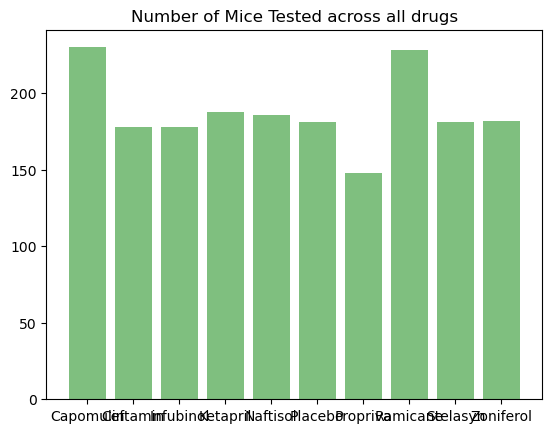

In [79]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
time_pts = cleaned_df.groupby('Drug Regimen')['Timepoint'].count().to_list()
array_drug_r = cleaned_df["Drug Regimen"].unique()
ordered_d_r = array_drug_r.sort()
list_d_r = array_drug_r.tolist()

plt.bar(list_d_r, time_pts, color='g', alpha=0.5, align="center")
plt.title("Number of Mice Tested across all drugs")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice Tested")
plt.show()

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumour vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
